선형회귀
==
- 선형회귀 함수사용
- 경사하강법 동작 이해

## 선형회귀 함수 사용법

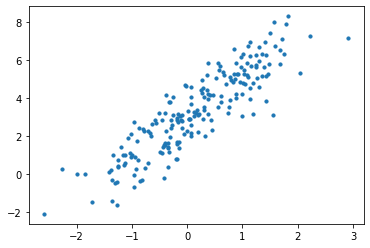

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

n_samples = 200
x = np.random.randn(n_samples)

# 계수 및 절편
w = 2
b = 3
# 노이지 추가
y = w*x + b + np.random.randn(n_samples)
plt.scatter(x,y, s=10)

In [2]:
np.corrcoef(x,y)

array([[1.        , 0.88831998],
       [0.88831998, 1.        ]])

In [3]:
from sklearn.linear_model import LinearRegression
leg = LinearRegression()
leg.fit(x.reshape(-1,1), y)

print(leg.coef_)
print(leg.intercept_)

[2.01661259]
3.0181926564031327


## 모델을 예측에 사용하기

In [8]:
leg.predict([[1],[5],[10]])

array([ 5.03480524, 13.10125559, 23.18431852])

## 경사하강법 구현

변수가 1개인 경우
--

In [12]:
num_epoch = 10
lr = 0.7

w = np.random.uniform()
b = np.random.uniform()

for epoch in range(num_epoch):
    y_pred = w*x + b
    error = np.abs(y_pred - y).mean()
    print(f"{epoch:2} w1 = {w:.6f}, b = {b:.6f} , error = {error:.6f}")

    w = w - lr*((y_pred - y)* x).mean()
    b = b - lr*((y_pred - y)).mean()

 0 w1 = 0.905024, b = 0.600321 , error = 2.626093
 1 w1 = 1.884029, b = 2.411952 , error = 0.970455
 2 w1 = 2.034861, b = 2.850528 , error = 0.816723
 3 w1 = 2.041010, b = 2.965938 , error = 0.802171
 4 w1 = 2.030809, b = 2.999902 , error = 0.798960
 5 w1 = 2.023575, b = 3.011184 , error = 0.798401
 6 w1 = 2.019817, b = 3.015344 , error = 0.798261
 7 w1 = 2.018047, b = 3.016995 , error = 0.798231
 8 w1 = 2.017246, b = 3.017680 , error = 0.798221
 9 w1 = 2.016891, b = 3.017971 , error = 0.798217


변수가 2개인 경우
--

In [13]:
n_samples = 200
x1 = np.random.randn(n_samples)
x2 = np.random.randn(n_samples)

y = 2 * x1 + 3 * x2 + 4 + np.random.randn(n_samples)

leg = LinearRegression()
X = pd.DataFrame({'x1':x1, 'x2':x2})
leg.fit(X, y)

print(leg.coef_)
print(leg.intercept_)

[1.89088099 2.96515876]
3.979580416614992


In [14]:
leg.score(X,y)

0.9232498694482834

경사하강법
--

In [15]:
num_epoch = 10
lr = 0.7

w1 = np.random.uniform()
w2 = np.random.uniform()
b = np.random.uniform()

for epoch in range(num_epoch):
    y_pred = w1*x1 + w2*x2 + b
    error = np.abs(y_pred - y).mean()
    print(f"{epoch:2} w1 = {w1:.6f},  w2 = {w2:.6f}, b = {b:.6f} , error = {error:.6f}")

    w1 = w1 - lr*((y_pred - y)* x1).mean()
    w2 = w2 - lr*((y_pred - y)* x2).mean()
    b = b - lr*((y_pred - y)).mean()

 0 w1 = 0.703174,  w2 = 0.056725, b = 0.240089 , error = 4.394657
 1 w1 = 2.115861,  w2 = 2.177295, b = 3.021586 , error = 1.312765
 2 w1 = 2.040977,  w2 = 2.739430, b = 3.682521 , error = 0.888746
 3 w1 = 1.950934,  w2 = 2.899056, b = 3.879228 , error = 0.837464
 4 w1 = 1.912573,  w2 = 2.945678, b = 3.944594 , error = 0.835026
 5 w1 = 1.898500,  w2 = 2.959421, b = 3.967251 , error = 0.835589
 6 w1 = 1.893538,  w2 = 2.963475, b = 3.975220 , error = 0.836052
 7 w1 = 1.891807,  w2 = 2.964668, b = 3.978037 , error = 0.836246
 8 w1 = 1.891204,  w2 = 2.965017, b = 3.979034 , error = 0.836316
 9 w1 = 1.890994,  w2 = 2.965118, b = 3.979387 , error = 0.836342
